In [18]:

import numpy as np
import pandas as pd 
from sklearn.preprocessing import minmax_scale
from sklearn.multioutput import RegressorChain
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt





In [19]:
def mean_euclidean_error(y_true, y_pred):
    """
    mean euclidean error MEE
    """

    error = 0
    if len(y_true) == len(y_pred):
        for i in range(len(y_true)):
            error = error + np.sqrt(np.square(y_pred[i][0]
                                    - y_true[i][0])
                                    + np.square(y_pred[i][1]
                                    - y_true[i][1]))
        return error / len(y_true)

In [4]:

train_df = pd.read_csv('../data/ML-CUP20-TR .csv')
test_df = pd.read_csv('../data/ML-CUP20-TS.csv')

# Spilitting the targets and input features



In [5]:


# Spilitting the targets and input features
train_x = train_df.iloc[:,:-2].to_numpy()
train_y = train_df.iloc[:,[10,11]].to_numpy()


In [24]:
(x_dev, x_test, y_dev, y_test) = train_test_split(train_x, train_y,
        test_size=0.25, random_state=30)
(x_train, x_val, y_train, y_val) = train_test_split(x_dev, y_dev,
        test_size=0.25, random_state=30)

In [23]:
"""regression models """

knn_model = Pipeline(steps=[('scale', StandardScaler(with_mean=True,
                     with_std=True)), ('estimator',
                     RegressorChain(KNeighborsRegressor(n_neighbors=4),
                     order=[0, 1]))])
et_regressor = Pipeline(steps=[('scale', StandardScaler()), ('estimator'
                        ,
                        RegressorChain(ExtraTreeRegressor(random_state=0),
                        order=[0, 1]))])
dt_regressor = Pipeline(steps=[('scale', StandardScaler(with_mean=True,
                        with_std=True)), ('estimator',
                        RegressorChain(DecisionTreeRegressor(random_state=0),
                        order=[0, 1]))])
direct_svr = Pipeline(steps=[('scale', StandardScaler(with_mean=True,
                      with_std=True)), ('estimator',
                      MultiOutputRegressor(SVR(kernel='rbf', C=0.1,
                      gamma='scale', epsilon=0.1)))])
chin_svr = Pipeline(steps=[('scale', StandardScaler(with_mean=True,
                    with_std=True)), ('estimator',
                    RegressorChain(SVR(kernel='rbf', C=0.1,
                    gamma='scale', epsilon=0.1)))])


In [25]:
"""parametres of models for gridsearch """

knn_params = {
    'estimator__base_estimator__n_neighbors': [
        5,
        6,
        7,
        8,
        9,
        10,
        ],
    'estimator__base_estimator__leaf_size': [1, 2, 3, 5],
    'estimator__base_estimator__weights': ['uniform', 'distance'],
    'estimator__base_estimator__algorithm': ['auto', 'ball_tree',
            'kd_tree', 'brute'],
    }

er_params = {
    'estimator__base_estimator__criterion': ['mse', 'mae', 'poisson',
            'friedman_mse'],
    'estimator__base_estimator__min_samples_split': [10, 20, 40, 'best'
            ],
    'estimator__base_estimator__max_depth': [2, 6, 8],
    'estimator__base_estimator__min_samples_leaf': [20, 40, 100],
    'estimator__base_estimator__max_leaf_nodes': [5, 20, 100],
    }

dt_params = {
    'estimator__base_estimator__criterion': ['mse', 'mae', 'poisson',
            'friedman_mse'],
    'estimator__base_estimator__min_samples_split': [10, 20, 40, 'best'
            ],
    'estimator__base_estimator__max_depth': [2, 6, 8],
    'estimator__base_estimator__min_samples_leaf': [20, 40, 100],
    'estimator__base_estimator__max_leaf_nodes': [5, 20, 100],
    }

dsvr_params = {
    'estimator__estimator__kernel': ['rbf'],
    'estimator__estimator__C': np.logspace(-3, 2, 6).tolist(),
    'estimator__estimator__gamma': [0.0001, 0.001, 0.01, 0.1],
    'estimator__estimator__epsilon': np.logspace(-3, 2, 6).tolist(),
    }
chinesvr_params = {
    'estimator__base_estimator__kernel': ['rbf'],
    'estimator__base_estimator__gamma': [0.0001, 0.001, 0.01, 0.1],
    'estimator__base_estimator__C': np.logspace(-3, 2, 6, 8).tolist(),
    'estimator__base_estimator__epsilon': np.logspace(-3, 2, 6,8).tolist(),
    }


In [21]:
""" list of regression_models, parameters_list and models name  """

regression_models = [knn_model, et_regressor, dt_regressor, direct_svr,
                     chin_svr]
parameters_list = [knn_params, er_params, dt_params, dsvr_params,
                   chinesvr_params]
model_log = ['KNeighborsRegressor', 'ExtraTreeRegressor',
             'DecisionTreeRegressor', 'MultiOutputRegressor',
             'RegressorChain']

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 400 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed:    6.0s finished


Best parameters:{'estimator__base_estimator__algorithm': 'auto', 'estimator__base_estimator__leaf_size': 1, 'estimator__base_estimator__n_neighbors': 10, 'estimator__base_estimator__weights': 'distance'}
Best training accuracy:0.9511940507564661
Mean_euclidean_error for TR dataset :0.0
Mean_euclidean_error for VL dataset :2.727770262164822
Mean_euclidean_error for TS dataset :2.665090504585905
Best model :Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 RegressorChain(base_estimator=KNeighborsRegressor(algorithm='auto',
                                                                   leaf_size=1,
                                                                   metric='minkowski',
                                                                   metric_params=None,
                                                                   n_jobs=None,
                  

/home/anelay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Unrecognized location 'Best'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


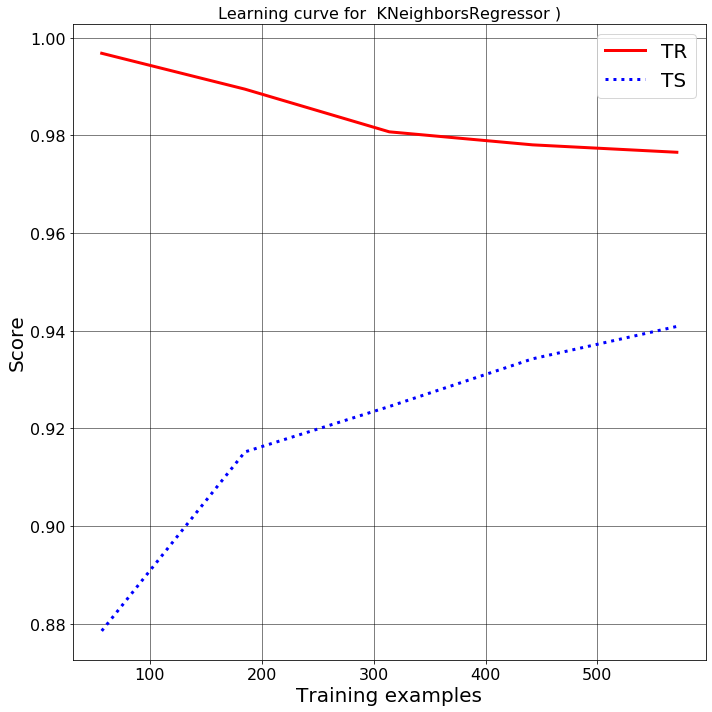

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed:    2.5s finished


Best parameters:{'estimator__base_estimator__criterion': 'mse', 'estimator__base_estimator__max_depth': 6, 'estimator__base_estimator__max_leaf_nodes': 20, 'estimator__base_estimator__min_samples_leaf': 20, 'estimator__base_estimator__min_samples_split': 10}
Best training accuracy:0.8397097597098663
Mean_euclidean_error for TR dataset :5.346413480252983
Mean_euclidean_error for VL dataset :5.737935175949917
Mean_euclidean_error for TS dataset :5.218577517460681
Best model :Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 RegressorChain(base_estimator=ExtraTreeRegressor(ccp_alpha=0.0,
                                                                  criterion='mse',
                                                                  max_depth=6,
                                                                  max_features='auto',
                                      

/home/anelay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Unrecognized location 'Best'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


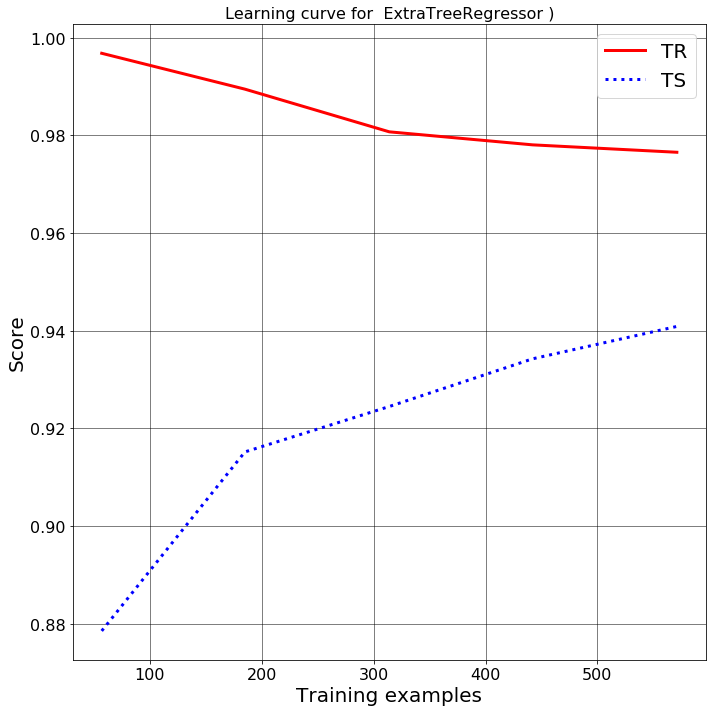

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1008 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed:    4.1s finished


Best parameters:{'estimator__base_estimator__criterion': 'mse', 'estimator__base_estimator__max_depth': 8, 'estimator__base_estimator__max_leaf_nodes': 100, 'estimator__base_estimator__min_samples_leaf': 20, 'estimator__base_estimator__min_samples_split': 10}
Best training accuracy:0.8663186497637492
Mean_euclidean_error for TR dataset :3.4906054317107595
Mean_euclidean_error for VL dataset :4.719817620061435
Mean_euclidean_error for TS dataset :4.331061178310719
Best model :Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 RegressorChain(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                     criterion='mse',
                                                                     max_depth=8,
                                                                     max_features=None,
                          

/home/anelay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Unrecognized location 'Best'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


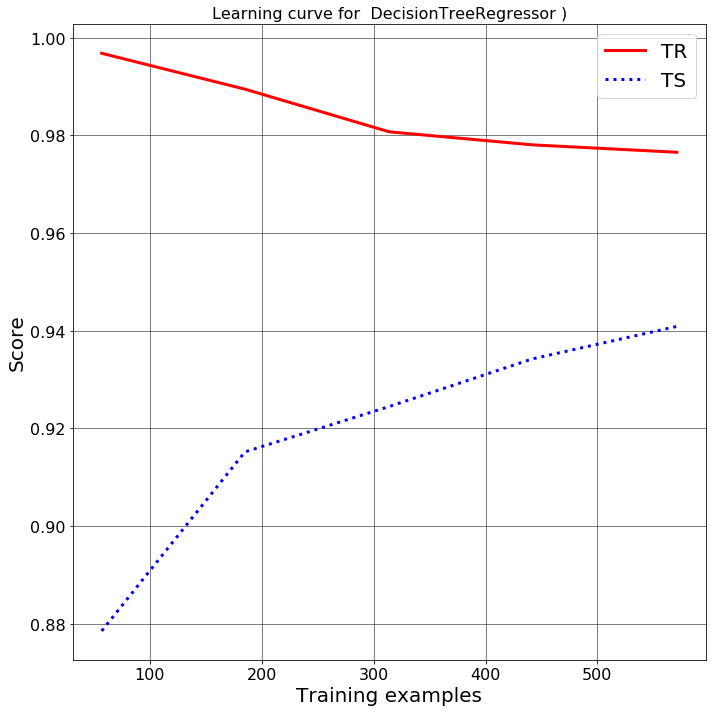

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 320 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:    3.8s finished


Best parameters:{'estimator__estimator__C': 10.0, 'estimator__estimator__epsilon': 1.0, 'estimator__estimator__gamma': 0.1, 'estimator__estimator__kernel': 'rbf'}
Best training accuracy:0.9367698633884315
Mean_euclidean_error for TR dataset :2.647656486389431
Mean_euclidean_error for VL dataset :2.945825872937676
Mean_euclidean_error for TS dataset :2.9541722843884344
Best model :Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 MultiOutputRegressor(estimator=SVR(C=10.0, cache_size=200,
                                                    coef0=0.0, degree=3,
                                                    epsilon=1.0, gamma=0.1,
                                                    kernel='rbf', max_iter=-1,
                                                    shrinking=True, tol=0.001,
                                                    verbose=False),
            

/home/anelay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Unrecognized location 'Best'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


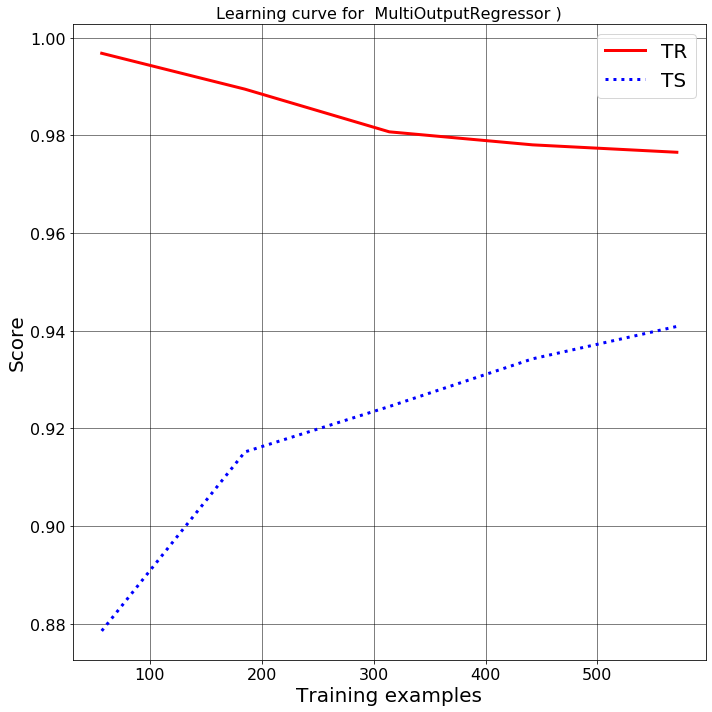

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 244 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:    4.7s finished


Best parameters:{'estimator__base_estimator__C': 100.0, 'estimator__base_estimator__epsilon': 0.1, 'estimator__base_estimator__gamma': 0.1, 'estimator__base_estimator__kernel': 'rbf'}
Best training accuracy:0.9409975338777263
Mean_euclidean_error for TR dataset :1.6964022283604905
Mean_euclidean_error for VL dataset :3.125407622470902
Mean_euclidean_error for TS dataset :3.165635785134591
Best model :Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 RegressorChain(base_estimator=SVR(C=100.0, cache_size=200,
                                                   coef0=0.0, degree=3,
                                                   epsilon=0.1, gamma=0.1,
                                                   kernel='rbf', max_iter=-1,
                                                   shrinking=True, tol=0.001,
                                                   verbose=Fals

/home/anelay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Unrecognized location 'Best'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


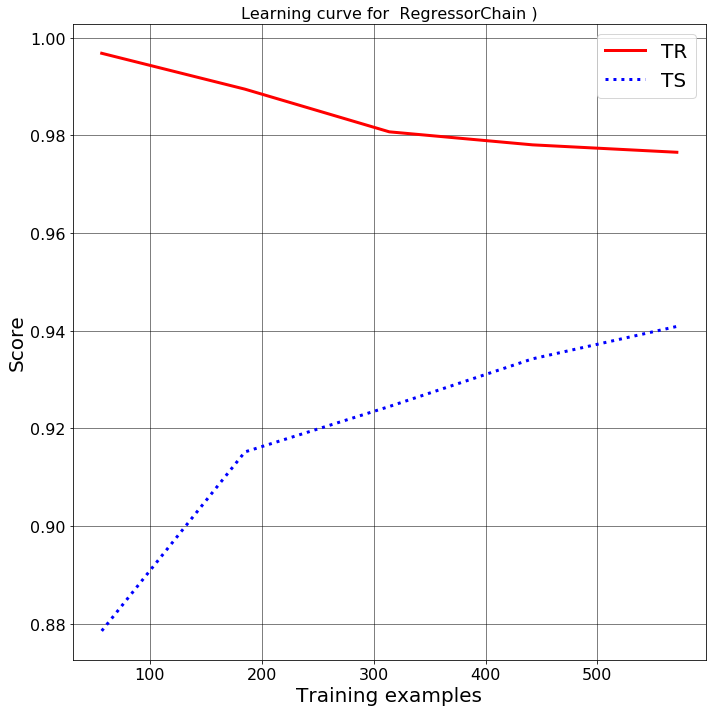

In [26]:

""" Gridsearch and Learning curve"""

for i in range(len(regression_models)):
    Grid = GridSearchCV(
        estimator=regression_models[i],
        param_grid=parameters_list[i],
        n_jobs=-1,
        cv=3,
        verbose=3,
        ).fit(x_train, y_train)
    y_trpred = Grid.predict(x_train)
    y_vlpred = Grid.predict(x_val)
    y_tspred = Grid.predict(x_test)
    df_result = pd.DataFrame(Grid.cv_results_)
    (train_sizes, train_scores, test_scores) = \
        learning_curve(Grid.best_estimator_, x_train, y_train, cv=3,
                       n_jobs=5)

    print(f"Best parameters:{Grid.best_params_}")
    print(f"Best training accuracy:{Grid.best_score_}")
#     print(f"Test dataset accuracy score for best params:{r2_score(y_tspred, y_train)}" )
    print(f"Mean_euclidean_error for TR dataset :{mean_euclidean_error(y_trpred, y_train)}" )
    print(f"Mean_euclidean_error for VL dataset :{mean_euclidean_error(y_vlpred, y_val)}" )
    print(f"Mean_euclidean_error for TS dataset :{mean_euclidean_error(y_tspred, y_test)}" )
    print(f"Best model :{Grid.best_estimator_}")

    (fig, ax) = plt.subplots(1, figsize=(10, 10))
    ax.grid(linestyle='-', linewidth='0.5', color='black')
    ax.set_axisbelow(True)
    plt.plot(train_sizes, train_scores_mean,
             label='TR', linewidth=3.0, ls='solid', c='red')

    plt.plot(train_sizes, test_scores_mean,
             label='TS', linewidth=3.0, ls='dotted', c='blue')
    plt.title(f"Learning curve for  {model_log[i]} )",fontsize=16)
    plt.xlabel('Training examples',fontsize=20)
    plt.ylabel('Score',fontsize=20)
    plt.legend(loc='Best',prop={"size":20})
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
            label.set_fontsize(16)
    plt.tight_layout()
    plt.savefig(model_log[i])
    plt.show()


In [13]:
RegressorChain(SVR()).get_params()
MultiOutputRegressor(SVR()).get_params()

{'estimator__C': 1.0,
 'estimator__cache_size': 200,
 'estimator__coef0': 0.0,
 'estimator__degree': 3,
 'estimator__epsilon': 0.1,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
     kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
 'n_jobs': None}